22.13073643385057 14.49854036431538
66.93304822451007 54.19605345094626


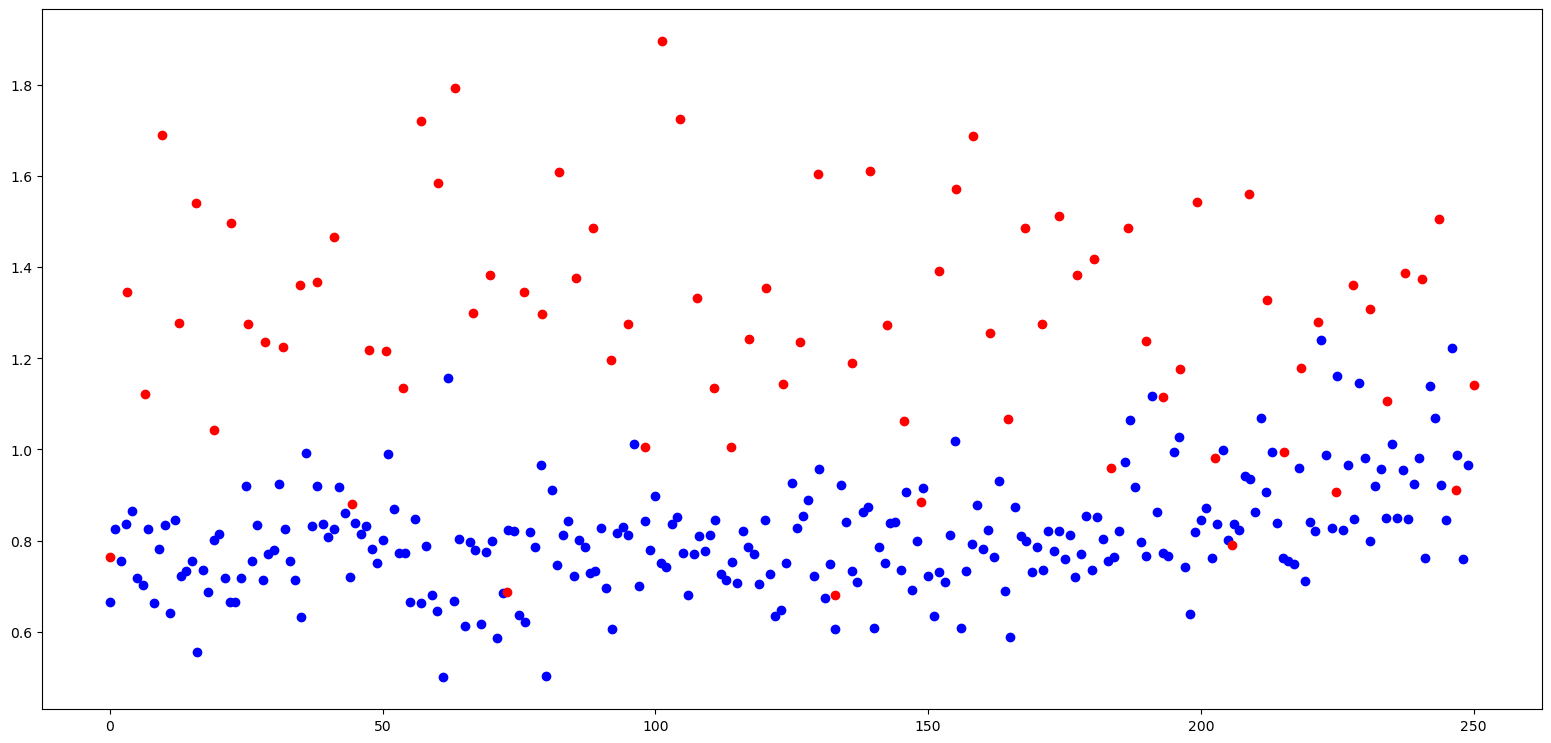

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

df_movie=pd.read_csv("data/movie_comments.csv",dtype={"score":np.float64,"content":str})
df_cele=pd.read_csv("data/cele_comments.csv",dtype={"score":np.float64})

group_id_movie=df_movie.groupby("id")
group_id_cele=df_cele.groupby("id")

commentlen_movie=list(map(lambda x:len(str(x)),df_movie["content"]))
commentlen_cele=list(map(lambda x:len(str(x)),df_cele["content"]))

mean_commentlen_movie=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_movie
]	# top250每部电影短评的平均长度
mean_commentlen_cele=[
    np.mean(list(map(lambda x:len(str(x)),i[1]["content"]))) for i in group_id_cele
]	# 对照组每部作品短评的平均长度

print(np.std(mean_commentlen_movie),np.std(mean_commentlen_cele))
print(np.mean(mean_commentlen_movie),np.mean(mean_commentlen_cele))

std_movie_score=[np.std(i[1]["score"]) for i in group_id_movie]
std_cele_score=[np.std(i[1]["score"]) for i in group_id_cele]

fig=plt.figure(figsize=(15,7))
ax=fig.add_axes([0, 0, 1, 1])

ax.scatter(range(250),std_movie_score,color="b")
ax.scatter(np.linspace(0,250,80),std_cele_score,color="r")

# ax.bar(range(len(mean_commentlen_movie)),mean_commentlen_movie,width=0.5)
# ax.bar(range(len(mean_commentlen_cele)),mean_commentlen_cele,width=0.5)

plt.show()

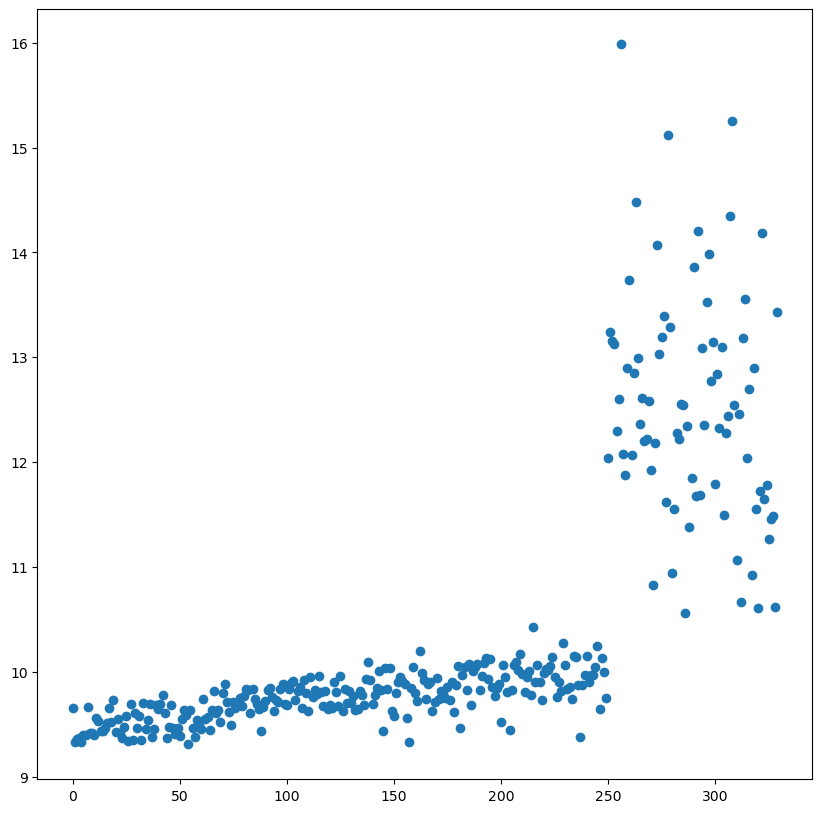

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rating_ratio=pd.read_csv("data/rating_ratio.csv")

dive=[]

for item in rating_ratio.iterrows():
    diver=0.0
    stars=item[1][2:8]

    s_diff=[]
    diff=[]
    for i in range(1,5):
        for j in range(i+1,6):
            val_1=stars[i]*stars[0]/100
            val_2=stars[j]*stars[0]/100
            if abs(val_1-val_2)==0 or abs(val_2-val_1)==1:
                val_1+=1.1
            s_diff.append(j-i)
            diff.append(abs(val_1/val_2))
    for i in range(10):
        diver+=s_diff[i]/diff[i]
    dive.append(np.log(diver*10000))

plt.figure(figsize=(10,10))
plt.scatter(range(len(dive)),dive)

plt.show()